In [291]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
%matplotlib inline

path1 = 'E:/used_card/used_car_train_20200313/'
path2 = 'E:/used_card/used_car_testA_20200313/'
Train_data = pd.read_csv(path1+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path2+'used_car_testA_20200313.csv', sep=' ')

In [293]:
# 删除不需要的数据
Train_data = Train_data.drop(['SaleID','name', 'seller', 'offerType'], axis=1)
Test_data = Test_data.drop(['name', 'seller', 'offerType'], axis=1)
Train_data=Train_data[Train_data['model'].notna()]
Train_data=Train_data[Train_data['model']!=247.0]
Train_data.reset_index(drop=True, inplace=True)

In [294]:
#可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [295]:
Train_data.isnull().sum()

SaleID                   0
regDate                  0
model                    0
brand                    0
bodyType              4506
fuelType              8679
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24323
regionCode               0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [24]:
'''X_missing_reg = Train_data.copy()
#将每个特征中缺失的个数找出来
print(np.sort(X_missing_reg.isnull().sum(axis=0)))
# 找出缺失值从小到大对应的索引值
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
print(sortindex)'''

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  4506  5981  8680 24324]
[ 0 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  8  7  3  2  1 26 27
  4  6  5  9]


In [18]:
'''sortindex=sortindex[-4:]
print(sortindex)'''

[4 6 5 9]


In [25]:
'''sortindex=sortindex[-4:]
from sklearn.impute import SimpleImputer  # 填充缺失值的类
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归

#随机森林预测值
for i in sortindex:
    
    # 构建新的特征矩阵和新标签
    df = X_missing_reg   # 所有的操作都在df上进行，只是最后得到的填充值作用在X_missing_reg上面
    fillc = df.iloc[:, i]   # 某个需要填充的列，索引为i
    
    # 没有被选中填充（!=）的特征与原始标签的连接起来；df就是新特征矩阵
    df = df.iloc[:, df.columns != i]  
    
    
    # 新的特征矩阵df中，对含有缺失值的列，进行0的填补
    # 检查是否有0 pd.DataFrame(df_0).isnull().sum() 
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    
    # 找出训练集和测试集
    ytrain = fillc[fillc.notnull()]  # 被选中填充的特征矩阵T中的非空值
    ytest = fillc[fillc.isnull()]  # 被选中填充的特征矩阵T中的空值
    Xtrain = df_0[ytrain.index, :]  # 新特征矩阵上，被选出来要填充的特征的非空值对应的记录
    Xtest = df_0[ytest.index, :]   # 空值对应的记录
    
    # 随机森林填充缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, ytrain)
    y_predict = rfc.predict(Xtest)  # predict接口预测
    
    # 将填补好的特征返回到我们的原始特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), i] = y_predict
    
Train_data=X_missing_reg
Train_data.info()#空的字符串需要先处理，要先把其他的缺失值包括字符串啥的处理好才行，要求所有数据都是float类型才行！
#结果发现随机森林预测出来的最好的填充都是0'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 32 columns):
SaleID               149999 non-null int64
regDate              149999 non-null int64
model                149999 non-null float64
brand                149999 non-null int64
bodyType             145493 non-null float64
fuelType             141319 non-null float64
gearbox              144018 non-null float64
power                149999 non-null int64
kilometer            149999 non-null float64
notRepairedDamage    125675 non-null object
regionCode           149999 non-null int64
creatDate            149999 non-null int64
price                149999 non-null int64
v_0                  149999 non-null float64
v_1                  149999 non-null float64
v_2                  149999 non-null float64
v_3                  149999 non-null float64
v_4                  149999 non-null float64
v_5                  149999 non-null float64
v_6                  149999 non-null float64
v_7 

In [47]:
'''Train_data['notRepairedDamage'].value_counts()#发现就是每个需要填充的众数也是0'''

0.0    111360
1.0     14315
Name: notRepairedDamage, dtype: int64

In [303]:
Train_data=Train_data.fillna('0').astype(float)
Train_data.info()
Train_data.isnull().sum()
Train_data['notRepairedDamage'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149998 entries, 0 to 149997
Data columns (total 28 columns):
SaleID               149998 non-null float64
regDate              149998 non-null float64
model                149998 non-null float64
brand                149998 non-null float64
bodyType             149998 non-null float64
fuelType             149998 non-null float64
gearbox              149998 non-null float64
power                149998 non-null float64
kilometer            149998 non-null float64
notRepairedDamage    149998 non-null float64
regionCode           149998 non-null float64
creatDate            149998 non-null float64
price                149998 non-null float64
v_0                  149998 non-null float64
v_1                  149998 non-null float64
v_2                  149998 non-null float64
v_3                  149998 non-null float64
v_4                  149998 non-null float64
v_5                  149998 non-null float64
v_6                  149998 non-nu

0.0    135683
1.0     14315
Name: notRepairedDamage, dtype: int64

In [302]:
#查看测试集是不是也是每个集合也是0是众数，如果是的话用0填充比较好,发现结果都是用0填充比较好
Test_data['notRepairedDamage'].value_counts()

0.0    45280
1.0     4720
Name: notRepairedDamage, dtype: int64

In [301]:
Test_data=Test_data.fillna('0').astype(float)
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
SaleID               50000 non-null float64
regDate              50000 non-null float64
model                50000 non-null float64
brand                50000 non-null float64
bodyType             50000 non-null float64
fuelType             50000 non-null float64
gearbox              50000 non-null float64
power                50000 non-null float64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null float64
regionCode           50000 non-null float64
creatDate            50000 non-null float64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non-null float64
v_6                  50000 non-null float64
v_7                  50000 non-null float64
v_8        

In [62]:
Train_data['regDate'].head(5).append(Train_data['creatDate'].head(5))

0    20040402
1    20030301
2    20040403
3    19960908
4    20120103
0    20160404
1    20160309
2    20160402
3    20160312
4    20160313
dtype: int64

In [72]:
#构造汽车使用时间的特征
'''T2 = Train_data.copy()
T2['use_year']=(T2['creatDate']/10000).astype(int)-(T2['regDate']/10000).astype(int)
T2['use_year'].sort_values()
T2['use_month']=((T2['creatDate']%10000)/100).astype(int)-((T2['regDate']%10000)/100).astype(int)
T2['use_month'].sort_values()
T2['use_day']=(T2['creatDate']%100).astype(int)-(T2['regDate']%100).astype(int)
T2['use_day'].sort_values()
T2['usetime']=T2['use_year']*365+T2['use_month']*30+T2['use_day']
T2['usetime'].sort_values()'''
Train_data = T2.drop(['use_year', 'use_month', 'use_day'], axis=1)
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 29 columns):
SaleID               149999 non-null int64
regDate              149999 non-null int64
model                149999 non-null float64
brand                149999 non-null int64
bodyType             149999 non-null object
fuelType             149999 non-null object
gearbox              149999 non-null object
power                149999 non-null int64
kilometer            149999 non-null float64
notRepairedDamage    149999 non-null object
regionCode           149999 non-null int64
creatDate            149999 non-null int64
price                149999 non-null int64
v_0                  149999 non-null float64
v_1                  149999 non-null float64
v_2                  149999 non-null float64
v_3                  149999 non-null float64
v_4                  149999 non-null float64
v_5                  149999 non-null float64
v_6                  149999 non-null float64
v_7    

In [74]:
#构造测试集汽车使用时间的特征
T2 = Test_data.copy()
T2['use_year']=(T2['creatDate']/10000).astype(int)-(T2['regDate']/10000).astype(int)
T2['use_year'].sort_values()
T2['use_month']=((T2['creatDate']%10000)/100).astype(int)-((T2['regDate']%10000)/100).astype(int)
T2['use_month'].sort_values()
T2['use_day']=(T2['creatDate']%100).astype(int)-(T2['regDate']%100).astype(int)
T2['use_day'].sort_values()
T2['usetime']=T2['use_year']*365+T2['use_month']*30+T2['use_day']
T2['usetime'].sort_values()
Test_data = T2.drop(['use_year', 'use_month', 'use_day'], axis=1)
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
SaleID               50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             50000 non-null object
fuelType             50000 non-null object
gearbox              50000 non-null object
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non-null float64
v_6                  50000 non-null float64
v_7                  50000 non-null float64
v_8                  50000 

In [118]:
# 从邮编中提取城市信息，相当于加入了先验知识
#Train_data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
#Train_data=Train_data.drop('regionCode',axis=1)
#Test_data['city'] = Test_data['regionCode'].apply(lambda x : str(x)[:-3])
#Test_data=Test_data.drop('regionCode',axis=1)
Test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
SaleID               50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             50000 non-null object
fuelType             50000 non-null object
gearbox              50000 non-null object
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non-null float64
v_6                  50000 non-null float64
v_7                  50000 non-null float64
v_8                  50000 non-null float64
v_9                  50000 non-null float64
v_10                 50

In [137]:
#数据分桶，汽车购买时间区间
bin_array=pd.to_datetime(np.array([20150601,20150701,20150801,20150901,20151001,20151101,20151201,20160101,20160201,20160301,20160401,20160501]),format='%Y%m%d',errors='coerce')
bin=bin_array.tolist()
bin

[Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2015-11-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00')]

In [139]:
#数据分桶
Train_data['bought_time'] = pd.to_datetime(Train_data['creatDate'], format='%Y%m%d', errors='coerce')
Train_data['bought_time_bin'] = pd.cut(Train_data['bought_time'], bin, labels=[1,2,3,4,5,6,7,8,9,10,11]) #用数字代表两者之间的区间，表示购买时间# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])
Train_data[['bought_time_bin', 'bought_time']].head()

,bought_time_bin,bought_time
0,11,2016-04-04
1,10,2016-03-09
2,11,2016-04-02
3,10,2016-03-12
4,10,2016-03-13


In [147]:
Test_data['bought_time'] = pd.to_datetime(Test_data['creatDate'], format='%Y%m%d', errors='coerce')
Test_data['bought_time_bin'] = pd.cut(Test_data['bought_time'], bin, labels=[1,2,3,4,5,6,7,8,9,10,11]) #用数字代表两者之间的区间.1表示2015年6月到7月，以此类推
Test_data[['bought_time_bin', 'bought_time']].head()

,bought_time_bin,bought_time
0,10,2016-03-29
1,11,2016-04-04
2,10,2016-03-08
3,10,2016-03-25
4,10,2016-03-09


In [153]:
Train_data=Train_data.drop(['buy_time','bought_time','creatDate'],axis=1)
Test_data=Test_data.drop(['bought_time','creatDate'],axis=1)

In [155]:
# 这里要以 train 的数据计算统计量
Train_gb = Train_data.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
#print(all_info)
#brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})    #逐步分解看怎么操作的
#print(brand_fe)
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
Train_data = Train_data.merge(brand_fe, how='left', on='brand')
Test_data = Test_data.merge(brand_fe, how='left', on='brand')

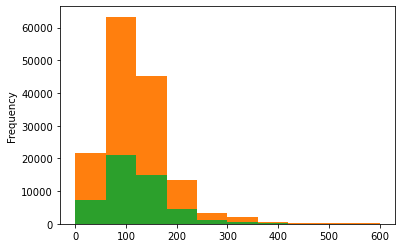

In [162]:
T4=Train_data.copy()
T4['power']=T4['power'].apply(lambda x:600 if x>600 else x)
T4['power'].plot.hist()
Train_data=T4
Train_data['power'].plot.hist()
Test_data['power']=Test_data['power'].apply(lambda x:600 if x>600 else x)
Test_data['power'].plot.hist()

In [167]:
bin = [0,1,20,40,60,80,100,120,140,160,180,200,250,300,400,500,601]
Train_data['power_bin'] = pd.cut(Train_data['power'], bin, right=False,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) #包括左边的区间值，也就是0
Train_data[['power_bin', 'power']].head()

,power_bin,power
0,4,60
1,0,0
2,9,163
3,10,193
4,4,68


In [168]:
bin = [0,1,20,40,60,80,100,120,140,160,180,200,250,300,400,500,601]
Test_data['power_bin'] = pd.cut(Test_data['power'], bin, right=False,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) #包括左边的区间值，也就是0
Test_data[['power_bin', 'power']].head()

,power_bin,power
0,13,313
1,4,75
2,6,109
3,9,160
4,4,75


In [191]:
Train_data.info()
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149998
Data columns (total 36 columns):
SaleID                 149999 non-null int64
model                  149999 non-null float64
brand                  149999 non-null int64
bodyType               149999 non-null float64
fuelType               149999 non-null float64
gearbox                149999 non-null float64
power                  149999 non-null int64
kilometer              149999 non-null float64
notRepairedDamage      149999 non-null float64
price                  149999 non-null int64
v_0                    149999 non-null float64
v_1                    149999 non-null float64
v_2                    149999 non-null float64
v_3                    149999 non-null float64
v_4                    149999 non-null float64
v_5                    149999 non-null float64
v_6                    149999 non-null float64
v_7                    149999 non-null float64
v_8                    149999 non-null float64
v_9 

In [190]:
#检查各变量
#Test_data['fuelType']=Test_data['fuelType'].astype(float)
Train_data['notRepairedDamage'].value_counts()

0.0    135684
1.0     14315
Name: notRepairedDamage, dtype: int64

In [195]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
Train_data.to_csv('E:\Traindata_for_tree_own.csv', index=0)
Test_data.to_csv('E:\Testdata_for_tree_own.csv', index=0)

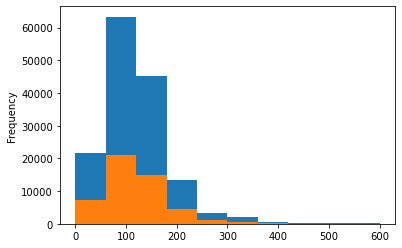

In [196]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
# 之所以分开构造是因为，不同模型对数据集的要求不同

#归一化的数据最好服从正态分布，不要有离群点太大或太小影响，所以连续变量归一化前看图

Train_data['power'].plot.hist()
Test_data['power'].plot.hist() #这样子便可以直接归一化了

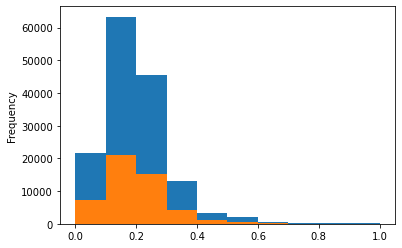

In [205]:
#归一化后再画图看看
#如果不是特别符合正态分布的图试试对数转化后再看看

#T1=Train_data.copy()
#T2=Test_data.copy()
# 我们对其取 log，在做归一化
#from sklearn import preprocessing 
#min_max_scaler = preprocessing.MinMaxScaler()
#T1['power'] = np.log(T1['power'] + 1) 
#T2['power'] = np.log(T2['power'] + 1) 
#T1['power'].plot.hist()
#T2['power'].plot.hist() 
#T1['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
#data['power'].plot.hist()  
#感觉不需要归一化效果也可以,所以自己没归一化

Train_data['power'] = ((Train_data['power'] - np.min(Train_data['power'])) / 
                        (np.max(Train_data['power']) - np.min(Train_data['power'])))
Train_data['power'].plot.hist()
Test_data['power'] = ((Test_data['power'] - np.min(Test_data['power'])) / 
                        (np.max(Test_data['power']) - np.min(Test_data['power'])))
Test_data['power'].plot.hist()

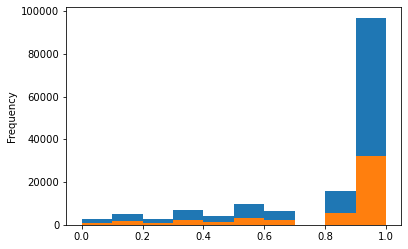

In [204]:
#Train_data['kilometer'].plot.hist()
#Test_data['kilometer'].plot.hist()

# 所以我们可以直接做归一化
Train_data['kilometer'] = ((Train_data['kilometer'] - np.min(Train_data['kilometer'])) / 
                        (np.max(Train_data['kilometer']) - np.min(Train_data['kilometer'])))
Train_data['kilometer'].plot.hist()
Test_data['kilometer'] = ((Test_data['kilometer'] - np.min(Test_data['kilometer'])) / 
                        (np.max(Test_data['kilometer']) - np.min(Test_data['kilometer'])))
Test_data['kilometer'].plot.hist()

"\ndata['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / \n                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))"

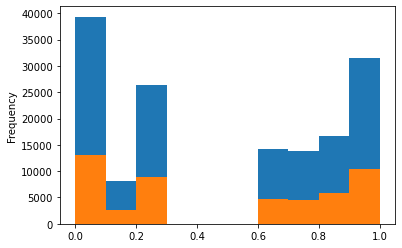

In [218]:
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

'''Train_data['brand_amount'] = max_min(Train_data['brand_amount'])
Train_data['brand_amount'].plot.hist()
Test_data['brand_amount'] = max_min(Test_data['brand_amount'])
Test_data['brand_amount'].plot.hist()

Train_data['brand_price_average'] = max_min(Train_data['brand_price_average'])
Train_data['brand_price_average'].plot.hist()
Test_data['brand_price_average'] = max_min(Test_data['brand_price_average'])
Test_data['brand_price_average'].plot.hist()

Train_data['brand_price_max'] = max_min(Train_data['brand_price_max'])
Train_data['brand_price_max'].plot.hist()
Test_data['brand_price_max'] = max_min(Test_data['brand_price_max'])
Test_data['brand_price_max'].plot.hist()

Train_data['brand_price_median'] = max_min(Train_data['brand_price_median'])
Train_data['brand_price_median'].plot.hist()
Test_data['brand_price_median'] = max_min(Test_data['brand_price_median'])
Test_data['brand_price_median'].plot.hist()

Train_data['brand_price_min'] = max_min(Train_data['brand_price_min'])
Train_data['brand_price_min'].plot.hist()
Test_data['brand_price_min'] = max_min(Test_data['brand_price_min'])
Test_data['brand_price_min'].plot.hist()

Train_data['brand_price_std'] = max_min(Train_data['brand_price_std'])
Train_data['brand_price_std'].plot.hist()
Test_data['brand_price_std'] = max_min(Test_data['brand_price_std'])
Test_data['brand_price_std'].plot.hist()


Train_data['brand_price_sum'] = max_min(Train_data['brand_price_sum'])
Train_data['brand_price_sum'].plot.hist()
Test_data['brand_price_sum'] = max_min(Test_data['brand_price_sum'])
Test_data['brand_price_sum'].plot.hist()'''

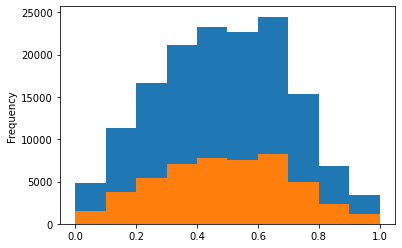

In [224]:
Train_data['usetime'] = max_min(Train_data['usetime'])
Train_data['usetime'].plot.hist()
Test_data['usetime'] = max_min(Test_data['usetime'])
Test_data['usetime'].plot.hist()

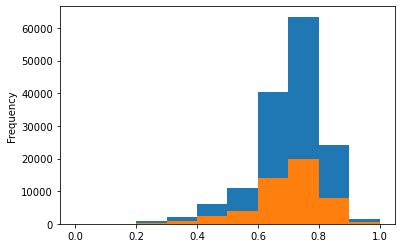

In [260]:
#V系列特征归一化
'''
Train_data['v_0'] = max_min(Train_data['v_0'])
Train_data['v_0'].plot.hist()
Test_data['v_0'] = max_min(Test_data['v_0'])
Test_data['v_0'].plot.hist()

Train_data['v_1'] = max_min(Train_data['v_1'])
Train_data['v_1'].plot.hist()
Test_data['v_1'] = max_min(Test_data['v_1'])
Test_data['v_1'].plot.hist()

Train_data['v_2'] = max_min(Train_data['v_2'])
Train_data['v_2'].plot.hist()
Test_data['v_2'] = max_min(Test_data['v_2'])
Test_data['v_2'].plot.hist()

Train_data['v_3'] = max_min(Train_data['v_3'])
Train_data['v_3'].plot.hist()
Test_data['v_3'] = max_min(Test_data['v_3'])
Test_data['v_3'].plot.hist()

Train_data['v_4'] = max_min(Train_data['v_4'])
Train_data['v_4'].plot.hist()
Test_data['v_4'] = max_min(Test_data['v_4'])
Test_data['v_4'].plot.hist()

Train_data['v_5'] = max_min(Train_data['v_5'])
Train_data['v_5'].plot.hist()
Test_data['v_5'] = max_min(Test_data['v_5'])
Test_data['v_5'].plot.hist()

Train_data['v_6'] = max_min(Train_data['v_6'])
Train_data['v_6'].plot.hist()
Test_data['v_6'] = max_min(Test_data['v_6'])
Test_data['v_6'].plot.hist()

Train_data['v_7'] = max_min(Train_data['v_7'])
Train_data['v_7'].plot.hist()
Test_data['v_7'] = max_min(Test_data['v_7'])
Test_data['v_7'].plot.hist()

Train_data['v_8'] = max_min(Train_data['v_8'])
Train_data['v_8'].plot.hist()
Test_data['v_8'] = max_min(Test_data['v_8'])
Test_data['v_8'].plot.hist()

Train_data['v_9'] = max_min(Train_data['v_9'])
Train_data['v_9'].plot.hist()
Test_data['v_9'] = max_min(Test_data['v_9'])
Test_data['v_9'].plot.hist()

Train_data['v_10'] = max_min(Train_data['v_10'])
Train_data['v_10'].plot.hist()
Test_data['v_10'] = max_min(Test_data['v_10'])
Test_data['v_10'].plot.hist()

Train_data['v_11'] = max_min(Train_data['v_11'])
Train_data['v_11'].plot.hist()
Test_data['v_11'] = max_min(Test_data['v_11'])
Test_data['v_11'].plot.hist()

Train_data['v_12'] = max_min(Train_data['v_12'])
Train_data['v_12'].plot.hist()
Test_data['v_12'] = max_min(Test_data['v_12'])
Test_data['v_12'].plot.hist()

Train_data['v_13'] = max_min(Train_data['v_13'])
Train_data['v_13'].plot.hist()
Test_data['v_13'] = max_min(Test_data['v_13'])
Test_data['v_13'].plot.hist()


Train_data['v_14'] = max_min(Train_data['v_14'])
Train_data['v_14'].plot.hist()
Test_data['v_14'] = max_min(Test_data['v_14'])
Test_data['v_14'].plot.hist()
'''

In [245]:
Train_data['price'].describe()

count    149999.000000
mean       5923.047154
std        7501.238642
min          11.000000
25%        1300.000000
50%        3250.000000
75%        7700.000000
max       99999.000000
Name: price, dtype: float64

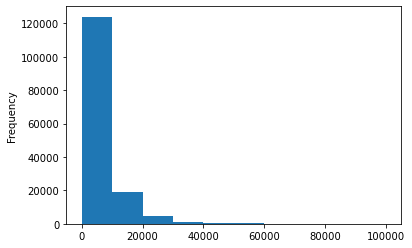

In [246]:
Train_data['price'].plot.hist()

In [262]:
# 对类别特征进行 OneEncoder
Train_data = pd.get_dummies(Train_data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage','city','bought_time_bin', 'power_bin'])
Test_data = pd.get_dummies(Test_data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage','city','bought_time_bin', 'power_bin'])

In [263]:
Train_data.info()
Test_data.info()#训练集比测试集除了价格还多一列，是因为除了价格，model类型训练集比测试集多一个，在下面选择剔除掉'model_247.0'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149998
Columns: 370 entries, SaleID to power_bin_15
dtypes: float64(25), int64(2), uint8(343)
memory usage: 81.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 368 entries, SaleID to power_bin_15
dtypes: float64(25), int64(1), uint8(342)
memory usage: 26.6 MB


In [271]:
#Train_data=Train_data.drop('model_247.0',axis=1)
Train_data.info()
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149998
Columns: 369 entries, SaleID to power_bin_15
dtypes: float64(25), int64(2), uint8(342)
memory usage: 81.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 368 entries, SaleID to power_bin_15
dtypes: float64(25), int64(1), uint8(342)
memory usage: 26.6 MB


In [272]:
# 这份数据可以给 LR  线性模型
Train_data.to_csv('E:\Traindata_for_lr_own.csv', index=0)
#Test_data.to_csv('E:\Testdata_for_lr_own.csv', index=0)

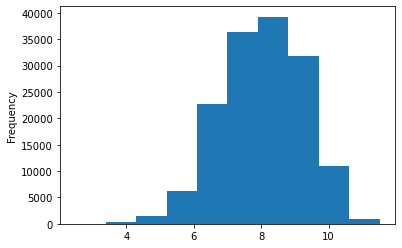

In [266]:
#先对price进行log变换，因为price有异常值
T=Train_data.copy()
T['price'] = np.log(T['price'] + 1) 
T['price'].plot.hist()

In [267]:
##特征筛选
#过滤式

# 相关性分析
print(T['power'].corr(T['price'], method='spearman'))
print(T['kilometer'].corr(T['price'], method='spearman'))
print(T['usetime'].corr(T['price'], method='spearman'))

print(T['brand_amount'].corr(T['price'], method='spearman'))
print(T['brand_price_max'].corr(T['price'], method='spearman'))
print(T['brand_price_median'].corr(T['price'], method='spearman'))
print(T['brand_price_min'].corr(T['price'], method='spearman'))
print(T['brand_price_std'].corr(T['price'], method='spearman'))
print(T['brand_price_average'].corr(T['price'], method='spearman'))

print(T['v_0'].corr(T['price'], method='spearman'))
print(T['v_1'].corr(T['price'], method='spearman'))
print(T['v_2'].corr(T['price'], method='spearman'))
print(T['v_3'].corr(T['price'], method='spearman'))
print(T['v_4'].corr(T['price'], method='spearman'))
print(T['v_5'].corr(T['price'], method='spearman'))
print(T['v_6'].corr(T['price'], method='spearman'))
print(T['v_7'].corr(T['price'], method='spearman'))
print(T['v_8'].corr(T['price'], method='spearman'))
print(T['v_9'].corr(T['price'], method='spearman'))
print(T['v_10'].corr(T['price'], method='spearman'))
print(T['v_11'].corr(T['price'], method='spearman'))
print(T['v_12'].corr(T['price'], method='spearman'))
print(T['v_13'].corr(T['price'], method='spearman'))
print(T['v_14'].corr(T['price'], method='spearman'))

0.5773363347291756
-0.40976564790258585
-0.779334537708848
0.05440350552857124
0.2587351415139394
0.39157948012057603
-0.008888876311719482
0.3512587845217383
0.38874730718715217
0.8732581723776437
0.15047173923738075
0.5976561650730704
-0.9253037058208804
-0.1499339224374335
0.35370646952820695
0.42342900417446855
0.021398560882914794
0.8360310213066325
-0.23563088243517102
-0.5071854950861662
-0.41001155254970906
0.8600685759186506
0.052513471958638085
0.18915935855441646


In [273]:
#检查训练集没有重复值
T=Train_data.copy()
T=T.drop_duplicates()
T.reset_index(drop=True)
T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149998
Columns: 369 entries, SaleID to power_bin_15
dtypes: float64(25), int64(2), uint8(342)
memory usage: 81.0 MB


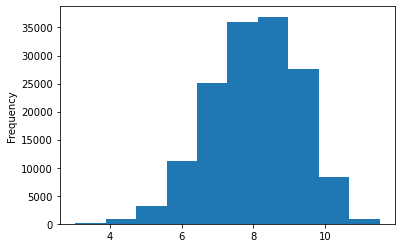

In [276]:
T=Train_data.copy()
T=T.drop('SaleID',axis=1)
T=T[T['price']>=20]
continuous_feature_names = [x for x in T.columns if x not in 'price']

train_x = T[continuous_feature_names]   #训练集x值

#在这里我们对标签进行了 log(x+1) 变换，使标签贴近于正态分布
train_Y = T['price']
train_y = np.log(train_Y + 1)            #训练集y值

train_y.plot.hist()

In [277]:
T1=Test_data.copy()
continuous_feature_names = [x for x in T1.columns]

test_x = T1[continuous_feature_names]   #测试集x值

In [279]:
#随机森林模型
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

rf = RandomForestRegressor()
n_estimators=[300,500,800]         #树的数量
max_depth=[3,6,8]
param_grid = { "max_depth": max_depth, "n_estimators": n_estimators}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(train_x, train_y)
print('best_score_:',gs.best_score_)
print('best_params_:',gs.best_params_)
print(gs.grid_scores_)
bp = gs.best_params_
forest = RandomForestRegressor(max_depth=bp['max_depth'],n_estimators=bp['n_estimators'])


#forest.fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [281]:
#Ridge回归
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,  make_scorer
model = Ridge()
scores = cross_val_score(model, X=train_x, y=train_y, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))
result = dict()
result['Ridge'] = scores
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
print(result)
model = Ridge().fit(train_x, train_y)
sub_ridge = model.predict(test_x)
## 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))#最大与最小值的差
    print('_std',np.std(data))
    print('_var',np.var(data))
Sta_inf(sub_ridge)
sub_ridge=sub_ridge.apply(lambda x:10 if x<10 else x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Administrator.RPK-20180123GWR\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 336. MiB for an array with shape (367, 119977) and data type float64

  FitFailedWarning)
C:\Users\Administrator.RPK-20180123GWR\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 336. MiB for an array with shape (367, 119977) and data type float64

  FitFailedWarning)
C:\Users\Administrator.RPK-20180123GWR\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator 

     Ridge
cv1    NaN
cv2    NaN
cv3    NaN
cv4    NaN
cv5    NaN


C:\Users\Administrator.RPK-20180123GWR\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 336. MiB for an array with shape (367, 119978) and data type float64

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


MemoryError: Unable to allocate 420. MiB for an array with shape (367, 149972) and data type float64

In [284]:
Train_data=Train_data.drop('SaleID',axis=1)
continuous_feature_names = [x for x in Train_data.columns if x not in 'price']

train_x = Train_data[continuous_feature_names]   #训练集x值


#在这里我们对标签进行了 log(x+1) 变换，使标签贴近于正态分布
#Train_data['price'].value_counts()
train_y =Train_data['price']       #训练集y值
train_y_ln = np.log(train_y + 1)

In [288]:
T=Test_data.copy()
#Test_data=Test_data.drop('SaleID',axis=1)

continuous_feature_names = [x for x in Test_data.columns]

test_x = Test_data[continuous_feature_names]   #测试集x值

In [290]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

#调参xgb模型函数
'''
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #, objective ='reg:squarederror'
'''
xgr = xgb.XGBRegressor()
def rf_cv(n_estimators, subsample, learning_rate, max_depth):
    val = cross_val_score(
        XGBRegressor(objective = 'regression_l1',
            subsample = subsample,
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            learning_rate=learning_rate
        ),
        train_x, train_y_ln, scoring=make_scorer(mean_absolute_error), cv=5,verbose=0
    ).mean()
    return 1-val
rf_bo = BayesianOptimization(
        rf_cv,
        {'n_estimators': (60, 250),
        'subsample': (0.1, 1),
        'learning_rate': (0.05, 0.2),
        'max_depth': (2, 100)}
    )

rf_bo.maximize()

|   iter    |  target   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------


C:\Users\Administrator.RPK-20180123GWR\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 336. MiB for an array with shape (367, 119999) and data type float64

  FitFailedWarning)
C:\Users\Administrator.RPK-20180123GWR\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 336. MiB for an array with shape (367, 120000) and data type float64

  FitFailedWarning)


|  1        |  nan      |  0.08173  |  7.305    |  158.3    |  0.2271   |
|  2        |  nan      |  0.1717   |  99.32    |  117.8    |  0.7751   |
|  3        |  nan      |  0.07419  |  80.37    |  157.1    |  0.4699   |
|  4        |  nan      |  0.05404  |  40.99    |  73.63    |  0.9356   |
|  5        |  nan      |  0.1036   |  68.22    |  188.9    |  0.6604   |


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').